## __Dropout and Success: Student Data Analysis__

Exploring the Impact of Dropout Rates on Student Success.

https://www.kaggle.com/datasets/marouandaghmoumi/dropout-and-success-student-data-analysis

### __Dataset Description__

This dataset was created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.

The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors:

- Marital status: Categorical variable indicating the marital status of the individual.
- Application mode: Categorical variable indicating the mode of application.
- Application order: Numeric variable indicating the order of application.
- Course: Categorical variable indicating the chosen course.
- evening attendance: Binary variable indicating whether the individual attends classes during the daytime or evening.
- Previous qualification: Numeric variable indicating the level of the previous qualification.
- Nationality: Categorical variable indicating the nationality of the individual.
- Mother's qualification: Numeric variable indicating the level of the mother's qualification.
- Father's qualification: Numeric variable indicating the level of the father's qualification.
- Mother's occupation: Categorical variable indicating the mother's occupation.
- Father's occupation: Categorical variable indicating the father's occupation.
- Displaced: Binary variable indicating whether the individual has been displaced (1 – yes 0 – no).
- Educational special needs: Binary variable indicating whether the individual has educational special needs (1 for yes, 0 for no).
- Debtor: Binary variable indicating whether the individual is a debtor (1 for yes, 0 for no).
- Tuition fees up to date: Binary variable indicating whether the tuition fees are up to date (1 for yes, 0 for no).
- Gender: Binary variable indicating the gender of the individual (1 for male, 0 for female).
- Scholarship holder: Binary variable indicating whether the individual holds a scholarship (1 for yes, 0 for no).
- Age at enrollment: Numeric variable indicating the age of the individual at the time of enrollment.
- International: Binary variable indicating whether the individual is international (1 for yes, 0 for no).
- Curricular units 1st sem (credited): Numeric variable indicating the number of credited curricular units in the 1st semester.
- Curricular units 1st sem (enrolled): Numeric variable indicating the number of enrolled curricular units in the 1st semester.
- Curricular units 1st sem (evaluations): Numeric variable indicating the number of evaluations for curricular units in the 1st semester.
- Curricular units 1st sem (approved): Numeric variable indicating the number of approved curricular units in the 1st semester.
- Curricular units 1st sem (grade): Numeric variable indicating the average grade for curricular units in the 1st semester.
- Curricular units 1st sem (without evaluations): Numeric variable indicating the number of curricular units in the 1st semester without evaluations.
- Curricular units 2nd sem (credited): Numeric variable indicating the number of credited curricular units in the 2nd semester.
- Curricular units 2nd sem (enrolled): Numeric variable indicating the number of enrolled curricular units in the 2nd semester.
- Curricular units 2nd sem (evaluations): Numeric variable indicating the number of evaluations for curricular units in the 2nd semester.
- Curricular units 2nd sem (approved): Numeric variable indicating the number of approved curricular units in the 2nd semester.
- Curricular units 2nd sem (grade): Numeric variable indicating the average grade for curricular units in the 2nd semester.
- Curricular units 2nd sem (without evaluations): Numeric variable indicating the number of curricular units in the 2nd semester without evaluations.
- Unemployment rate: variable indicating the unemployment rate(Unemployment rate (%)).
- Inflation rate: Numeric variable indicating the inflation rate(Inflation rate (%)).
- GDP: Numeric variable indicating the Gross Domestic Product.
- output: Categorical variable indicating the target variable (e.g., Dropout, Graduate, Enrolled).

#### __Fetching data from Kaggle__

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle"
os.makedirs("/content/kaggle", exist_ok=True)
!mv kaggle.json /content/kaggle/
!chmod 600 /content/kaggle/kaggle.json
!kaggle datasets download -d marouandaghmoumi/dropout-and-success-student-data-analysis
!unzip dropout-and-success-student-data-analysis.zip

Dataset URL: https://www.kaggle.com/datasets/marouandaghmoumi/dropout-and-success-student-data-analysis
License(s): apache-2.0
  0% 0.00/87.2k [00:00<?, ?B/s]
100% 87.2k/87.2k [00:00<00:00, 305MB/s]
Archive:  dropout-and-success-student-data-analysis.zip
  inflating: student_data.csv        


#### __Import the necessary libraries__

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


#### __Pre-processing the dataset__

In [5]:
student_data = pd.read_csv("student_data.csv", delimiter=';')
student_data.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
student_data.shape

(4424, 35)

#### __Inspecting the data__

In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   evening attendance                              4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [11]:
student_data['Output'].value_counts()

,count
Output,
Graduate,2209
Dropout,1421
Enrolled,794


In [7]:
student_data.describe()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
missing_values = student_data.isna().sum()
missing_values

,0
Marital status,0
Application mode,0
Application order,0
Course,0
evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [9]:
duplicate_values = student_data.duplicated().sum()
duplicate_values

np.int64(0)

In [18]:
student_data['Marital status'].value_counts()

,count
Marital status,
1,3919
2,379
4,91
5,25
6,6
3,4


#### __Visualizing the data__

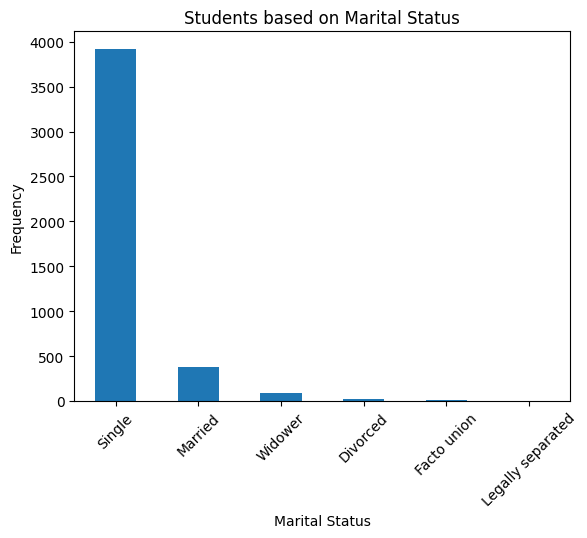

In [17]:
student_data['Marital status'].value_counts().plot(kind='bar')
plt.title('Students based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto union', 'Legally separated'], rotation=45)
plt.show()

#### __Perform train-test split__

In [12]:
# Separate features and target variable
# Assuming 'Output' is the target variable in your dataset

X = student_data.drop('Output', axis=1)
y = student_data['Output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)